# 1.5)

## Question
13. In many pattern classiﬁcation problems one has the option either to assign the
pattern to one of c classes, or to reject it as being unrecognizable. If the cost for
rejects is not too high, rejection may be a desirable action. Let
\begin{equation}
\lambda(\alpha_i | \omega_j) = 
\begin{cases}
    0 & i=j \\
    \lambda_r & i = c+1 \\
    \lambda_s & otherwise \\
\end{cases}
\end{equation}
where $\lambda_r$ is the loss incurred for choosing the (c + 1)th action, rejection, and $\lambda_s$ is the loss incurred for making a substitution error. Show that the minimum risk is obtained if we decide $\omega_i$ if $P(\omega_i | x) \ge P(\omega_j | x)$ for all j and if $P(\omega_i | x) \gt 1- \frac{\lambda_r}{\lambda_s}$, and reject otherwise.  What happens if $\lambda_r = 0$? What happens if $\lambda_r \gt \lambda_s$?

## Answer


$$R(\alpha_i|x) = \sum_{j=1}^c \lambda_s P(\omega_j | x) = \lambda_s[1 - P(\omega_i|x)]$$
$$ R(\alpha_{c+1}|x) = \lambda_r $$

To minimize risk, then is to classify the sample whenever $\lambda_s[1-P(\omega_i | x)] \lt \lambda_r$.  Re-writing this, the classifier should chose $\omega_i$ when $P(\omega_i | x) \gt 1 - \frac{\lambda_r}{\lambda_s}$.

If $\lambda_r = 0$, it costs nothing to classify an example as being unrecognizable.  An optimal solution for the problem is to then just classify every example as unrecognizable, incurring a cost of 0.  
If $\lambda_r \gt \lambda_s$, then it is less costly to missclassify an example then to mark it as unrecognizable.  The optimal solution is then to never use the option to classify something as unrecognizable.

# 1.6)
### Note: For the duration of problems 1.6 and 1.7, blue dots represent $\omega_1$ and green dots represent $\omega_2$, as the method I used for color scatterplots has trouble with legends...

Generates samples all from one class, chooses class randomly.  Prior is $P(x \in \mu_2)$

In [10]:
function [samples, classes] = generateGaussianSamples(mu1, mu2, sigma1, sigma2, nSamples, prior)
    gen1 = mvnrnd(mu1, sigma1, nSamples);
    gen2 = mvnrnd(mu2, sigma2, nSamples);
    classes = rand(nSamples, 1) < prior;
    samples = gen1 .* !classes + gen2 .* classes;
end

In [231]:
function [samples, classes] = plot_results(mu1, mu2, sigma1, sigma2, nSamples, prior, title_text)
    [samples, classes] = generateGaussianSamples(mu1, mu2, sigma1, sigma2, nSamples, prior);
    % Colormap from solarized colors for fun
    c = [38 139 210; 133 153 0] / 256;
    figure
    colormap(c)
    scatter(samples(:,1), samples(:,2), 200, classes + 1, '.')
    title(title_text)
    xlabel(['N(\mu_1, \sigma_1)']),
    ylabel('N(\mu_2, \sigma_2)')
end

## a)

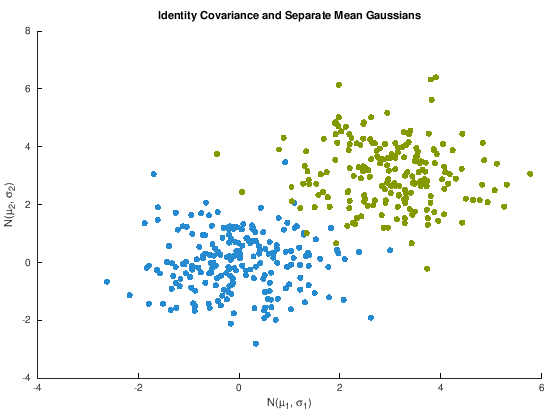

In [232]:
mua1 = [0; 0];
mua2 = [3; 3];
sigmaa1 = sigmaa2 = eye(2);
[smpa clsa] = plot_results(mua1, mua2, sigmaa1, sigmaa2, 400, 0.5, 'Identity Covariance and Separate Mean Gaussians');

## b)

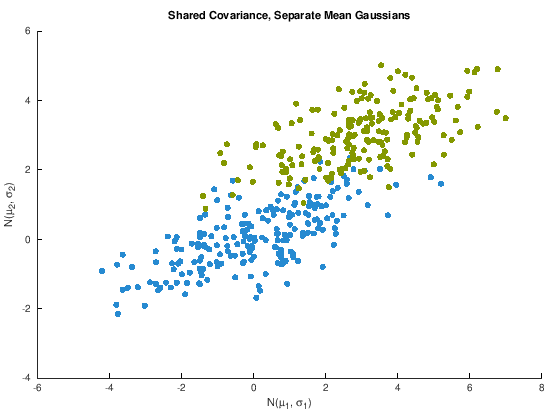

In [233]:
mub1 = [0; 0];
mub2 = [3; 3];
sigmab1 = sigmab2 = [3 1; 1 0.8];
[smpb clsb] = plot_results(mub1, mub2, sigmab1, sigmab2, 400, 0.5, 'Shared Covariance, Separate Mean Gaussians');

## c)

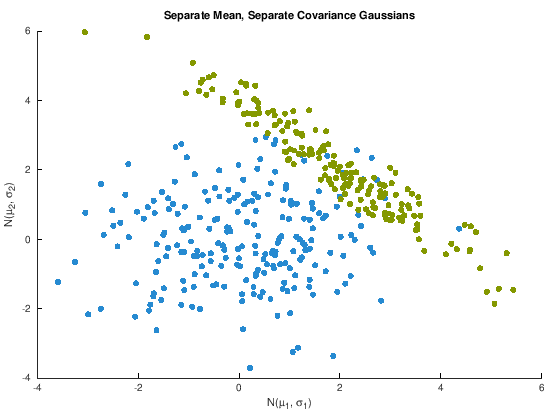

In [234]:
muc1 = [0; 0];
muc2 = [2; 2];
sigmac1 = [2 0.5; 0.5 2];
sigmac2 = [2 -1.9; -1.9 2];
[smpc clsc] = plot_results(muc1, muc2, sigmac1, sigmac2, 400, 0.5, 'Separate Mean, Separate Covariance Gaussians');

## d)

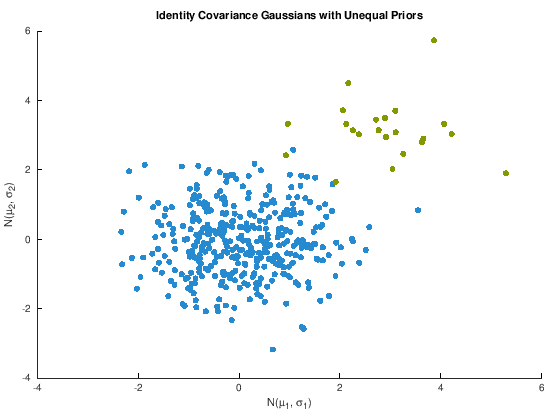

In [235]:
mud1 = [0; 0];
mud2 = [3; 3];
sigmad1 = sigmad2 = eye(2);
[smpd clsd] = plot_results(mud1, mud2, sigmad1, sigmad2, 400, 0.05, 'Identity Covariance Gaussians with Unequal Priors');

## e)

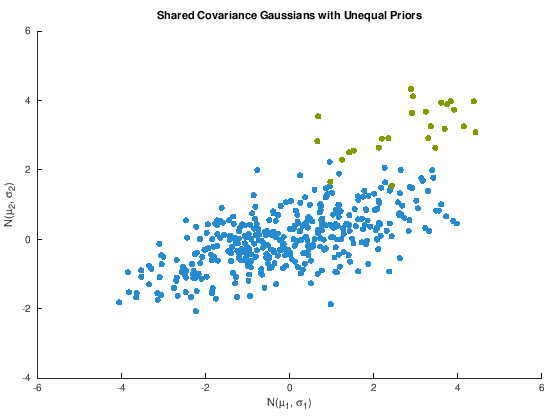

In [236]:
mue1 = [0; 0];
mue2 = [3; 3];
sigmae1 = sigmae2 = [3 1; 1 0.8];
[smpe clse] = plot_results(mue1, mue2, sigmae1, sigmae2, 400, 0.05, 'Shared Covariance Gaussians with Unequal Priors');

## f)

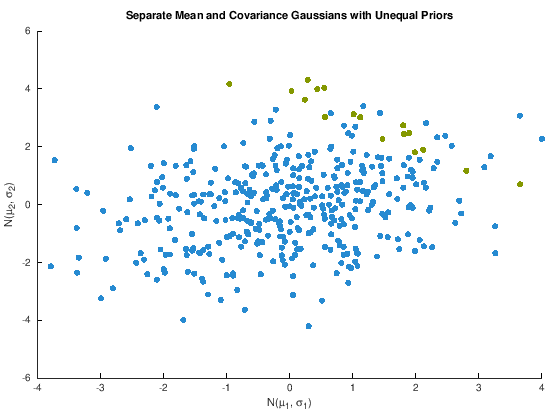

In [237]:
muf1 = [0; 0];
muf2 = [2; 2];
sigmaf1 = [2 0.5; 0.5 2];
sigmaf2 = [2 -1.9; -1.9 2];
[smpf clsf] = plot_results(muf1, muf2, sigmaf1, sigmaf2, 400, 0.05, 'Separate Mean and Covariance Gaussians with Unequal Priors');

# 1.7)

In [126]:
function preds = map_unit_cov(mu1, mu2, samples, p2)
    p1 = mvnpdf(samples, mu1, eye(2)) * (1-p2);
    p2 = mvnpdf(samples, mu2, eye(2)) * p2;
    preds = [p1 p2];
end

In [127]:
function preds = map_shared_cov(mu1, mu2, sigma, samples, p2)
    p1 = mvnpdf(samples, mu1, sigma) * (1-p2);
    p2 = mvnpdf(samples, mu2, sigma) * p2;
    preds = [p1 p2];
end

In [128]:
function preds = map_general(mu1, mu2, sigma1, sigma2, samples, p2)
    p1 = mvnpdf(samples, mu1, sigma1) * (1-p2);
    p2 = mvnpdf(samples, mu2, sigma2) * p2;
    preds = [p1 p2];
end

In [154]:
function preds = max_prior(samples, p2)
    preds_vec = [ones(length(samples), 1) zeros(length(samples), 1)];
    if p2 < 0.5
        preds = preds_vec;
    else
        preds = !preds_vec;
    end
end

In [130]:
function acc = accuracy(probs, answers)
    preds = (probs(:,1) < probs(:,2));
    acc = sum(preds == answers) / length(answers);
end

In [138]:
function plot_w_color(samples, predclasses, classes, pre_title)
    pctacc = accuracy(predclasses, classes) * 100;
    [~, predcls] = max(predclasses, [], 2);
    % Colormap from solarized colors for fun
    c = [38 139 210; 133 153 0] / 256;
    figure
    colormap(c)
    scatter(samples(:,1), samples(:,2), 200, classes + 1, '.')
    title([pre_title num2str(pctacc) "% accuracy"])
    xlabel('N(\mu_1, \sigma_1)')
    ylabel('N(\mu_2, \sigma_2)')
end

In [139]:
function plot_boundary(mu1, mu2, sigma1, sigma2, p2, range)
    pdf1 = @(x,y)(reshape(mvnpdf([x(:) y(:)], mu1, sigma1)*(1-p2), length(x), length(y)));
    pdf2 = @(x,y)(reshape(mvnpdf([x(:) y(:)], mu2, sigma2)*p2, length(x), length(y)));
    discriminant = @(x, y)(double(pdf1(x, y) > pdf2(x, y)));
    x = y = range;
    [X, Y] = meshgrid(x, y);
    contour(X, Y, discriminant(X, Y));
end

## a)

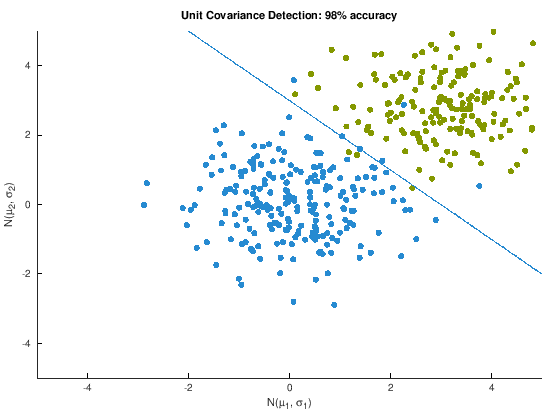

In [196]:
preds = map_unit_cov(mua1, mua2, smpa, 0.5);
plot_w_color(smpa, preds, clsa, 'Unit Covariance Detection: ')
hold on
plot_boundary(mua1, mua2, eye(2), eye(2), 0.5, -5:0.01:5)

## b)

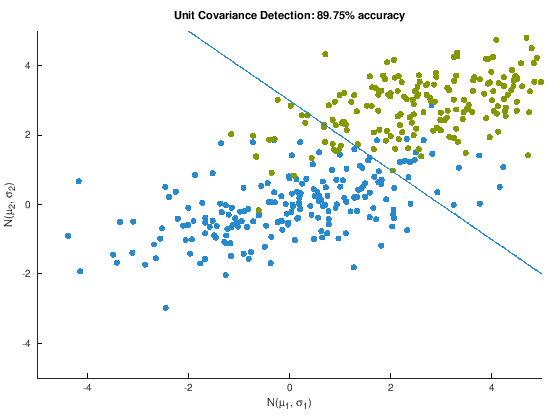

In [197]:
preds = map_unit_cov(mub1, mub2, smpb, 0.5);
plot_w_color(smpb, preds, clsb, 'Unit Covariance Detection: ')
hold on
plot_boundary(mub1, mub2, eye(2), eye(2), 0.5, -5:0.01:5)

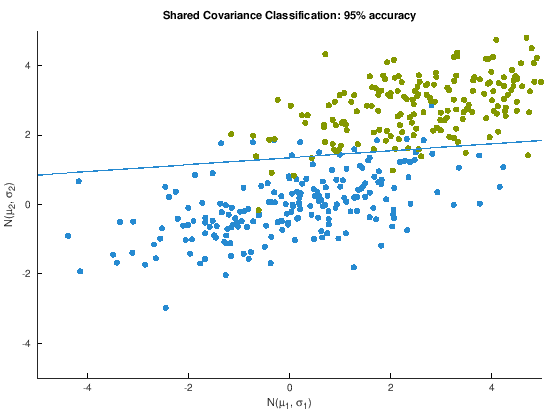

In [199]:
preds = bayes_shared_cov(mub1, mub2, sigmab1, smpb, 0.5);
plot_w_color(smpb, preds, clsb, 'Shared Covariance Classification: ')
hold on
plot_boundary(mub1, mub2, sigmab1, sigmab2, 0.5, -5:0.01:5)

The classifier using the shared covariance is significantly more accurate.  The reason for this is that using the identity matrix as the covariance limits the shape of the decision boundary, not allowing it to account for the rotation in the shapes of the distributions.

## c)

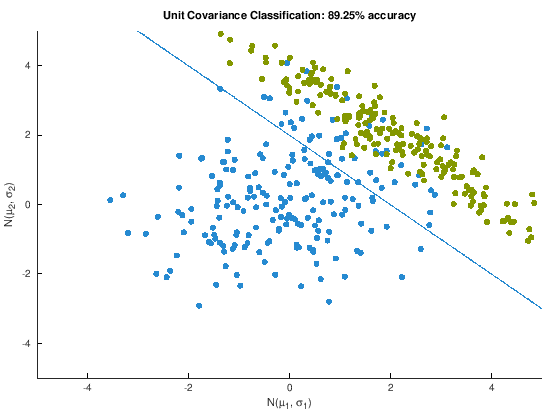

In [200]:
preds = map_unit_cov(muc1, muc2, smpc, 0.5);
plot_w_color(smpc, preds, clsc, "Unit Covariance Classification: ")
hold on
plot_boundary(muc1, muc2, eye(2), eye(2), 0.5, -5:0.01:5)

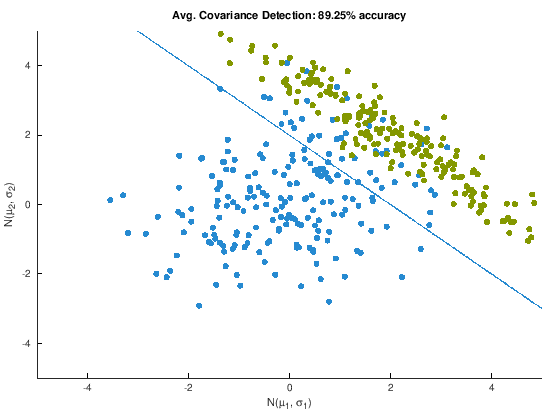

In [201]:
avg_cov = (sigmac1 + sigmac2) / 2;
preds = map_shared_cov(muc1, muc2, avg_cov, smpc, 0.5);
plot_w_color(smpc, preds, clsc, 'Avg. Covariance Detection: ')
hold on
plot_boundary(muc1, muc2, avg_cov, avg_cov, 0.5, -5:0.01:5)

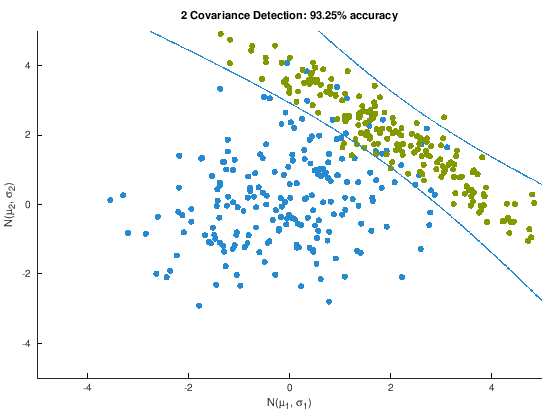

In [202]:
preds = map_general(muc1, muc2, sigmac1, sigmac2, smpc, 0.5);
plot_w_color(smpc, preds, clsc, '2 Covariance Detection: ')
hold on
plot_boundary(muc1, muc2, sigmac1, sigmac2, 0.5, -5:0.01:5)

The first and second classifiers perform similarly, while the third classifier does much better.  This performance boost makes sense, because in the first and second examples, the classifier is passed a single covariance, making the decision boundary a simple line.  In the third example, separate covariances for each distribution are passed, allowing for the more complex, hyperbolic decision boundary.

## d)

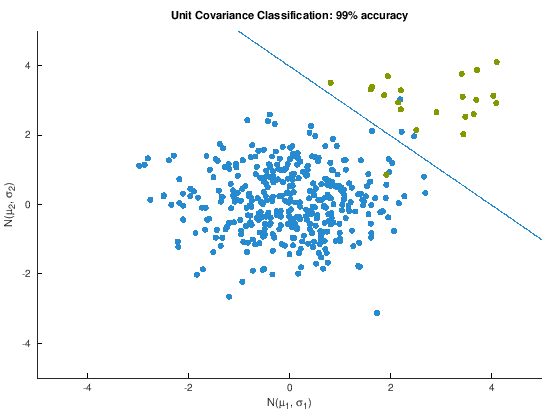

In [203]:
preds = map_unit_cov(mud1, mud2, smpd, 0.05);
plot_w_color(smpd, preds, clsd, 'Unit Covariance Classification: ')
hold on
plot_boundary(mud1, mud2, eye(2), eye(2), 0.05, -5:0.01:5)

In [159]:
mp = max_prior(smpd, 0.05);
acc_all_one_class = accuracy(mp, clsd)

acc_all_one_class =  0.94250


Classifying all points as part of the class with the higher prior will have an accuracy equal to the prior of the most likely class.  In this problem, that would get us to  on average 95% accuracy, because $P(\omega_1) = .95$ (measured at 94.25% above).  The classifer may be worthless in many settings however, because the $P(correct | \omega_2) = 0$.

## e)

In [205]:
mp = max_prior(smpe, 0.05);
acc_all_one_class = accuracy(mp, clse)

acc_all_one_class =  0.93000


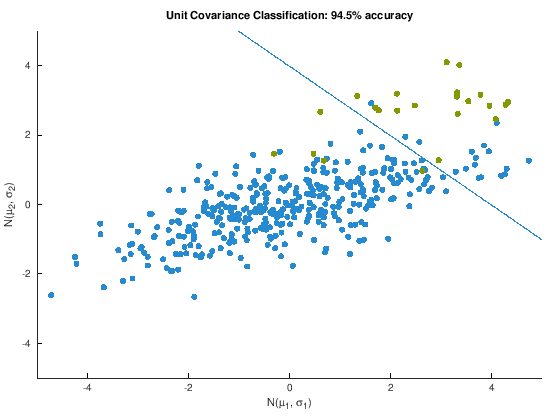

In [206]:
preds = map_unit_cov(mue1, mue2, smpe, 0.05);
plot_w_color(smpe, preds, clse, 'Unit Covariance Classification: ')
hold on
plot_boundary(mue1, mue2, eye(2), eye(2), 0.05, -5:0.01:5)

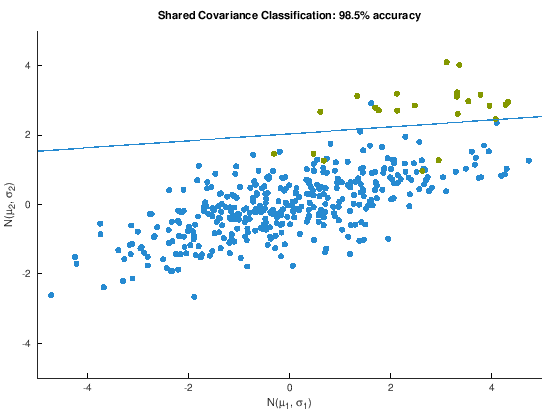

In [207]:
preds = map_shared_cov(mue1, mue2, sigmae1, smpe, 0.05);
plot_w_color(smpe, preds, clse, 'Shared Covariance Classification: ')
hold on
plot_boundary(mue1, mue2, sigmae1, sigmae2, 0.05, -5:0.01:5)

The second classifier gets a much better accuracy.  The reason for this is that providing separate covariances allows the decision boundary to rotate, better fitting the data.  The accuracy of the first classifier is not horrible at 93.5%, however looking at the plot, it is obviously not fitting the data well, and $P(error|\omega_2)$ is quite high.

## f)

In [159]:
mp = max_prior(smpf, 0.05);
acc_all_one_class = accuracy(mp, clsf)

acc_all_one_class =  0.94250


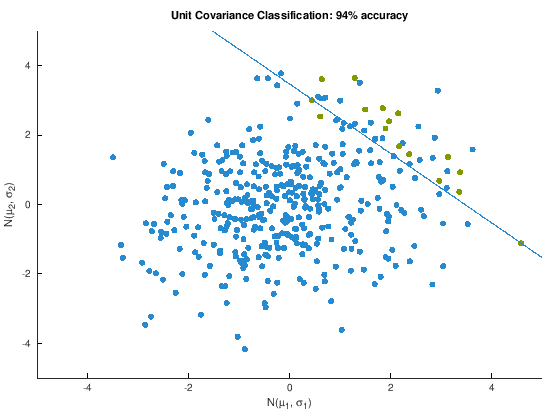

In [208]:
preds = map_unit_cov(muf1, muf2, smpf, 0.05);
plot_w_color(smpf, preds, clsf, 'Unit Covariance Classification: ')
hold on
plot_boundary(muf1, muf2, eye(2), eye(2), 0.05, -5:0.01:5)

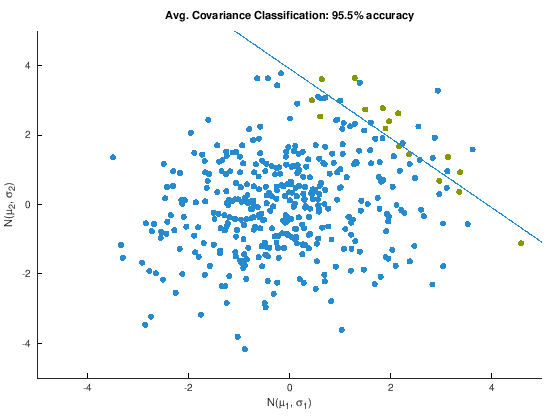

In [209]:
avg_cov = (sigmaf1 + sigmaf2) / 2;
preds = map_shared_cov(muf1, muf2, avg_cov, smpf, 0.05);
plot_w_color(smpf, preds, clsf, 'Avg. Covariance Classification: ')
hold on
plot_boundary(muf1, muf2, avg_cov, avg_cov, 0.05, -5:0.01:5)

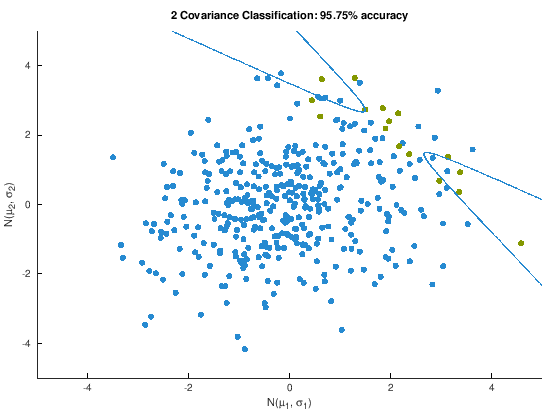

In [210]:
preds = map_general(muf1, muf2, sigmaf1, sigmaf2, smpf, 0.05);
plot_w_color(smpf, preds, clsf, '2 Covariance Classification: ')
hold on
plot_boundary(muf1, muf2, sigmaf1, sigmaf2, 0.05, -5:0.01:5)

In this example, the average covariance actually hurts the classifier, diminishing its accuracy from 95.25% to 93.5%.  The reason for this is that the average is not weighted by prior probabilities, and so $\omega_2$ greatly moves the average, despite the fact that it accounts for a small number of samples.  Adding this average actually hurts the classifier so badly that it would be more accurate for it to discard $\omega_2$ completely, and classify everything as $\omega_1$

# Appendix for fun but unused functions

Plots distributions as 3d surfaces

In [227]:
function plot_dists(mu1, mu2, sigma1, sigma2)
    X1 = X2 = linspace(-5, 5);
    [x1, x2] = meshgrid(X1, X2);
    gen1 = mvnpdf([x1(:) x2(:)], mu1, sigma1);
    gen1 = reshape(gen1, length(x1), length(x2));
    gen2 = mvnpdf([x1(:) x2(:)], mu2, sigma2);
    gen2 = reshape(gen2, length(x1), length(x2));
    maxdist = max(gen1, gen2);
    colormap("default")
    surf(x1, x2, maxdist)
end

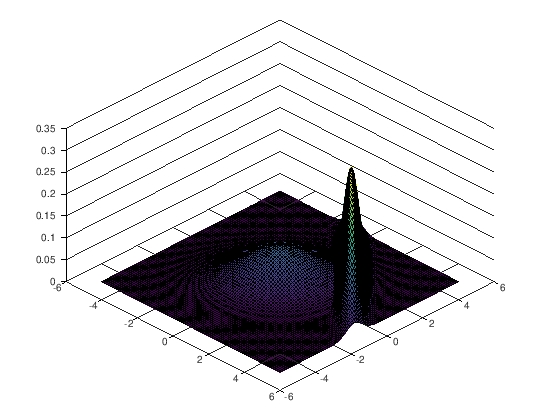

In [228]:
plot_dists(muf1, muf2, sigmaf1, sigmaf2)
view(45, 45)

In [9]:
pkg load statistics